# Interpolación. Integración numérica: métodos del Trapacio y Simpson.

# Interpolación de Lagrange.

### Ejercicio 1.- Sea $P(x)$ el polinomio interpolador de Lagrange de la función $f(x)=\cos(x)$ en los nodos 
### $$ p_k=\frac{k}{5} \qquad (k=0,1,\dots,5) $$ 
 
### [a] Calcula $P(x)$ y represéntalo gráficamente junto con $f(x)$ en el intervalo $[0,1]$.
 
### [b] Calcula una cota superior teórica para el error $|f(x)-P(x)|$ en el intervalo $[0,1]$.
 
### [c] Representa gráficamente la "función error" $|f(x)-P(x)|$ en el intervalo $[0,1]$, comprobando que es menor que la cota obtenida en el apartado (b).

SOLUCIÓN

### a) Calcula $P(x)$ y represéntalo gráficamente junto con $f(x)$ en el intervalo $[0,1]$.

Vamos a definir la función $f$ y el conjunto de nodos $X$ con el que estamos trabajando. Por último, $XY$, será el conjunto de puntos por los que tendremos que definir el polinomio de interpolación de Lagrange.

In [1]:
f(x)=cos(x)
f

x |--> cos(x)

Los nodos 
 $$ p_k=\frac{k}{5} \qquad (k=0,1,\dots,5) $$ 
se difenen de la siguiente forma:

In [2]:
X=[ k/5 for k in [0..5]] 
X

[0, 1/5, 2/5, 3/5, 4/5, 1]

La malla de puntos $XY$ son los puntos:
$$(p_0,f(p_0)), \quad (p_1,f(p_1)), \quad ...\quad,(p_5,f(p_5))$$
que este caso concreto son:

In [3]:
XY=[(X[k],f(X[k])) for k in [0..5]]
XY

[(0, 1),
 (1/5, cos(1/5)),
 (2/5, cos(2/5)),
 (3/5, cos(3/5)),
 (4/5, cos(4/5)),
 (1, cos(1))]

Usamos el operador <strong>lagrange_polynomial</strong> para obtener el polinomio interpolador de Lagrange en los puntos dados, y lo llamamos "P":

In [4]:
 P(x)=RR['x'].lagrange_polynomial(XY)

In [5]:
show(P)

x |--> -0.00396204670695720*x^5 + 0.0460465507263182*x^4 - 0.00228618031571069*x^3 - 0.499447901404085*x^2 - 0.0000481164314259097*x + 1.00000000000000

Ahora representamos la función $f(x)=\cos(x)$ en color rosa ('pink') junto con el polinomio de lagrange que aparece en color azul y la malla de nodos $XY$ en color gris ('grey').

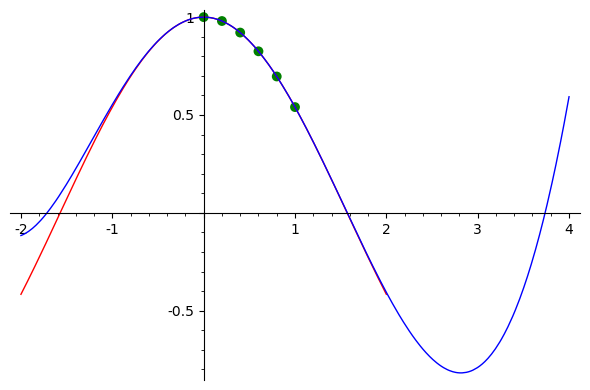

In [9]:
plot(f,-2,2,color='red')+plot(P,-2,4)+point2d(XY,size=50,color='green') 

### b) Calcula una cota superior teórica para el error $|f(x)-P(x)|$ en el intervalo $[0,1]$.

Para calcular una cota superior teórica del error debemos tener en cuenta que si $M>0$ cumple $\big|f^{(n+1)}(x)\big|\leq M$ para todo $x\in [x_0,x_n]$ entonces 
    $$\big|f(x)-P(x)\big| \leq \dfrac{M}{(n+1)!}\prod_{i=0}^n|x-x_i|\,$$
para todo $x\in [x_0,x_n]$.

Para calcularla debemos tener en cueta que:
$$| x-x_0|\leq |b-a|,\quad | x-x_1|\leq |b-a|, \quad ... \quad, | x-x_n|\leq |b-a|$$
para todo $x\in [x_0,x_n]=[a,b]$.

Con lo cual  $$\prod_{i=0}^n|x-x_i|=|x-x_0|·|x-x_1|·...·|x-x_n|\leq |b-a|·|b-a|·...·|b-a|=|b-a|^{n+1}$$  para todo $x\in [x_0,x_n]=[a,b]$, 

De aquí se deduce que: 
$$
\big|f(x)-P(x)\big| \leq \dfrac{M}{(n+1)!}\prod_{i=0}^n|x-x_i|\, \leq \dfrac{M}{(n+1)!}(b-a)^{n+1} \quad\mbox{para todo }x\in [a,b].\,$$ 
Por último, la <strong>cota superior numérica del error<strong> es:
$$
	\boxed{cota=\dfrac{M}{(n+1)!}(b-a)^{n+1}}
	\quad
	\mbox{para todo } {x}\in [a,b].
$$ 

Comenzamos acotando la derivada $(n+1)-$ésima de $f$. Aquí, en el caso en el que nos compete, $x_0=0,x_n=1,n=5.$
Calculemos en primer lugar el valor $M$. Para ello podemos hacerlo de dos formas:

In [10]:
abs(diff(f,x,5+1))

x |--> abs(cos(x))

Una cota superior obvia para $\big|f^{(n+1)}(x)\big| = \big |\cos(x)\big|\leq 1$, pero podemos verlo a través de su representación gráfica como sigue.

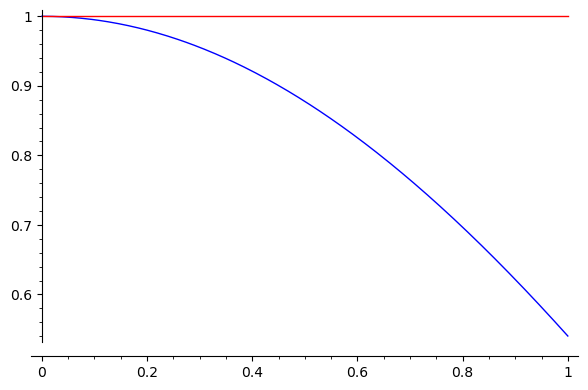

In [11]:
plot(abs(diff(f,x,5+1)),0,1)+plot(1,0,1,color='red')

Por otro lado,
$$
	\boxed{\big|f( {x})-P( {x})\big| \leq \dfrac{M}{(n+1)!}\prod_{i=0}^n| x-x_i|\leq  \dfrac{1}{(5+1)!}(1-0)^{5+1} =  \dfrac{1}{6!}1^{6}=\dfrac{1}{6!}}
	\quad
	\mbox{para todo } {x}\in [x_0,x_n].
$$
Así que la cota superior numérica del error es:

In [12]:
cota=1/factorial(6)
cota,cota.n()

(1/720, 0.00138888888888889)

### c) Representa gráficamente la "función error" $|f(x)-P(x)|$ en el intervalo $[0,1]$, comprobando que es menor que la cota obtenida en el apartado (b).

La <strong>función error real</strong> es
$$
	\boxed{| f(x)-P(x)|}
	\quad
	\mbox{para todo } {x}\in [a,b].
$$

La <strong>función cota del error</strong> es:
$$
	\boxed{error(x)=\dfrac{M}{(n+1)!}\prod_{i=0}^n| {x}-x_i|}
	\quad
	\mbox{para todo } {x}\in [a,b].
$$
Por último, la <strong>cota superior numérica del error</strong> es:
$$
	\boxed{cota=\dfrac{M}{(n+1)!}(b-a)^{n+1}}
	\quad
	\mbox{para todo } {x}\in [a,b].
$$


En nuestro caso concreto, la funciónn cota del error es

In [13]:
M=1
error(x)=M/factorial(5+1)*prod([abs(x-X[k]) for k in [0..5]]);

In [14]:
show(error)

x |--> 1/720*abs(x - 1/5)*abs(x - 2/5)*abs(x - 3/5)*abs(x - 4/5)*abs(x - 1)*abs(x)

En el siguiente plot se observa que la función error efectivamente es mayor que el error real. Sin embargo, es engañoso porque nos da valores en el eje Y incorrectos; el error cometido realmente es mucho menor.

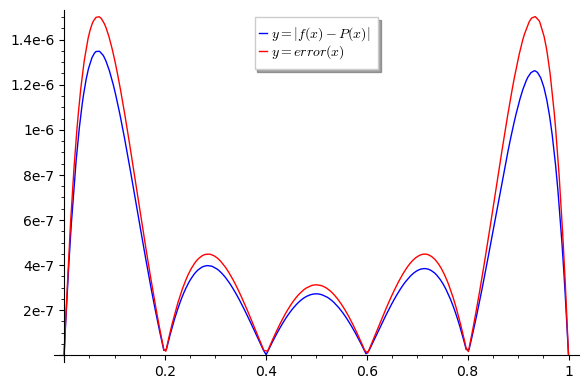

In [15]:
plot(abs(f(x)-P(x)),x,0,1,legend_label='$y=|f(x)-P(x)|$')+plot(error,0,1,legend_label='$y=error(x)$',color='red')

En el siguiente plot se aprecia que efectivamente la cota numérica es mucho mayor que la función error y que el error real cometido.

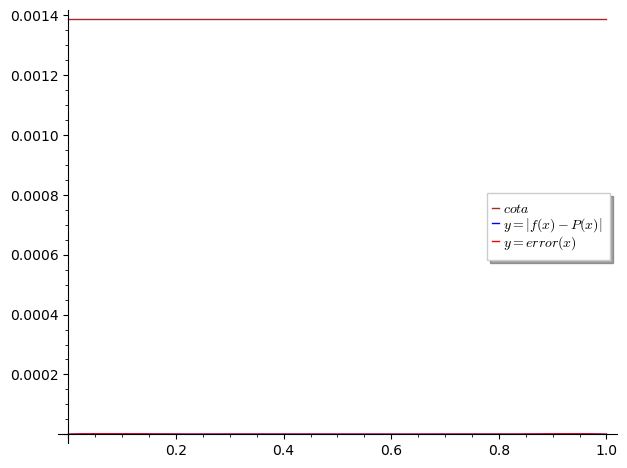

In [13]:
plot(cota,0,1,color='brown',legend_label='$cota$')+plot(abs(f(x)-P(x)),x,0,1,legend_label='$y=|f(x)-P(x)|$')+plot(error,0,1,legend_label='$y=error(x)$',color='red')